In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization_utils import perc, SetPlotRC, ApplyFont

In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

# Sparse Mixing Scenario

In [15]:
df_sparse_results = pd.read_pickle(r"../Results/simulation_results_sparse_mixing_distributionV1.pkl")

In [16]:
results = df_sparse_results[['Model', 'mixing_dist', 'SINR']].groupby(['Model', 'mixing_dist']).agg({'mixing_dist':'size', 'SINR':'mean'}).rename(columns={'mixing_dist':'count','SINR':'SINR'}).reset_index()
# results
table = pd.DataFrame(columns = (["mixing_dist"] + list(df_sparse_results['Model'].unique())))
table['mixing_dist'] = list(results['mixing_dist'].unique())
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

,mixing_dist,CorInfoMax,LDMI,PMF
0,laplace,29.838155,30.170318,29.030748
1,normal,29.679559,29.836464,29.122195
2,uniform,29.865952,30.128183,29.839944
3,uniform2,29.904257,29.902335,29.655363


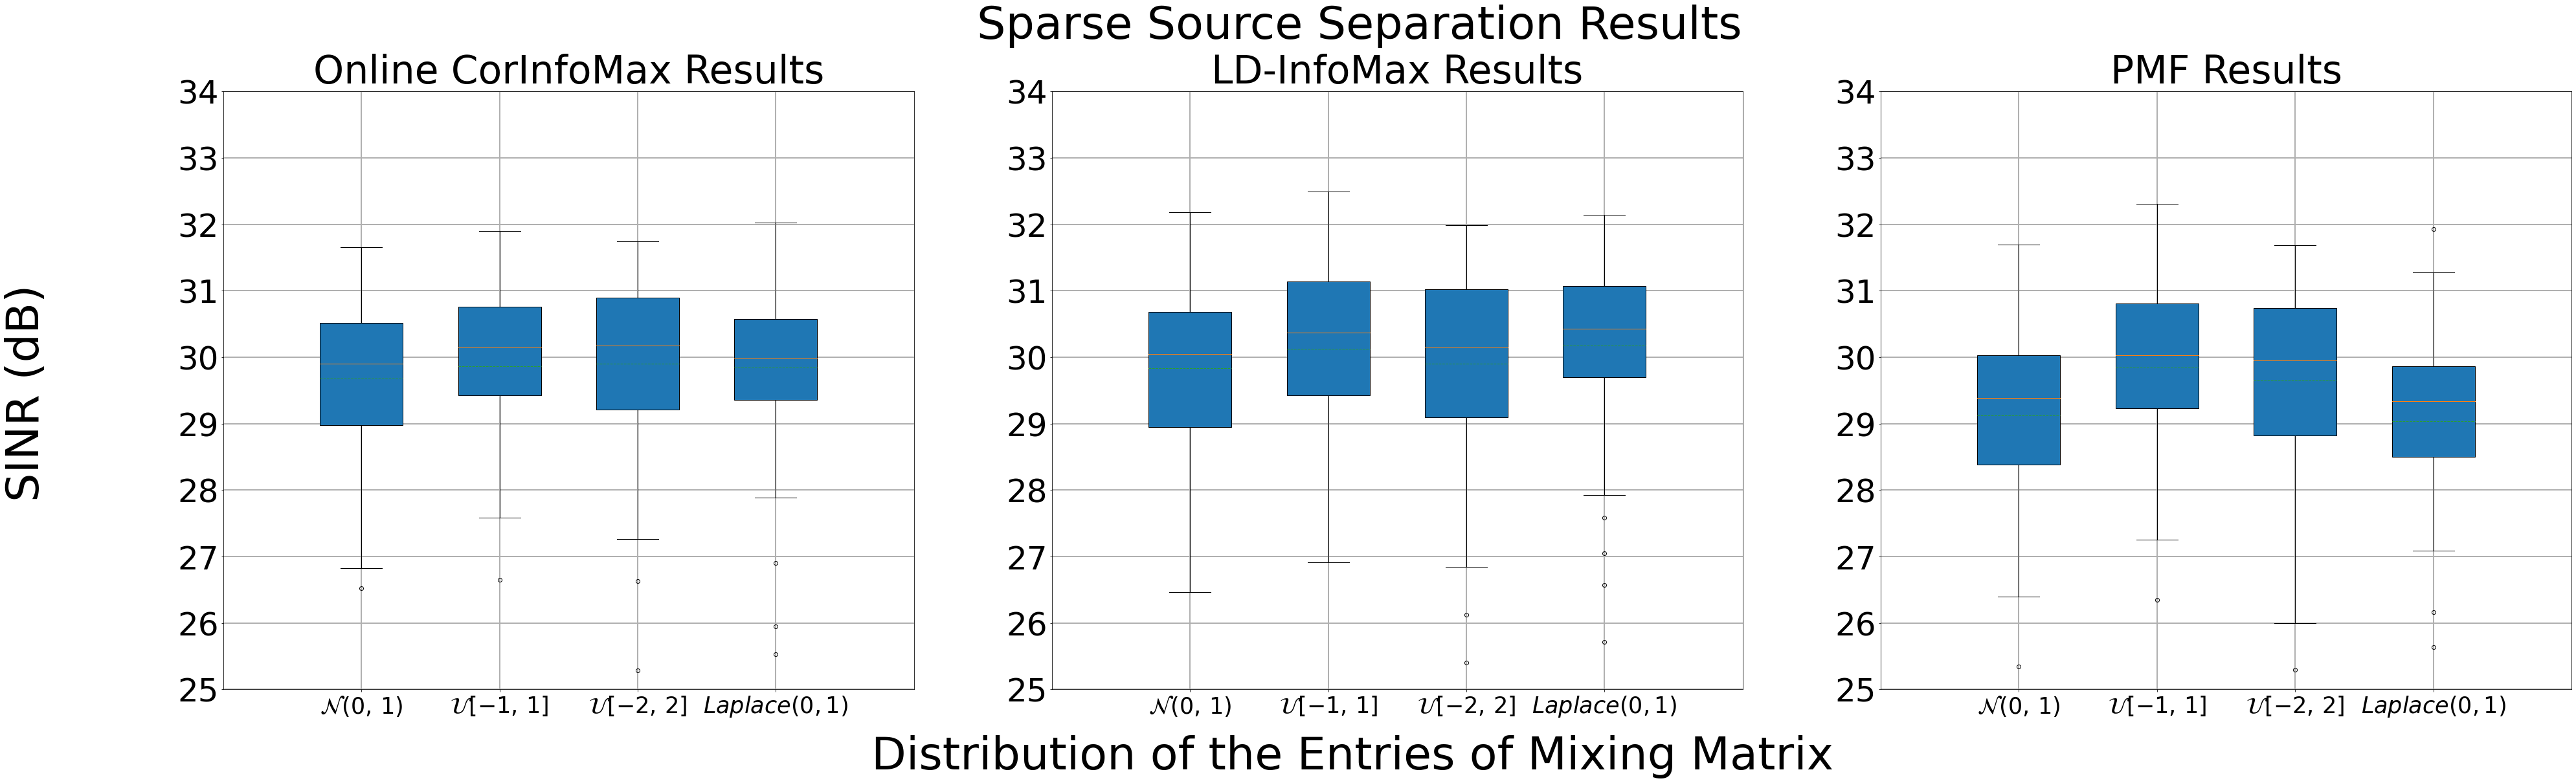

In [19]:
xticks_fontsize = 35
yticks_fontsize = 50
xlabel_fontsize = 70
ylabel_fontisize = 70
title_fontsize = 60
suptitle_fontsize = 70

CorInfoMaxSINRResults = []
LDMISINRResults = []
PMFSINRResults = []
for dist in ['normal', "uniform", "uniform2", "laplace"]:
    CorInfoMaxSINRResults.append(df_sparse_results.loc[(df_sparse_results['Model'] == "CorInfoMax") & (df_sparse_results['mixing_dist'] == dist)]['SINR'].values)
    LDMISINRResults.append(df_sparse_results.loc[(df_sparse_results['Model'] == "LDMI") & (df_sparse_results['mixing_dist'] == dist)]['SINR'].values)
    PMFSINRResults.append(df_sparse_results.loc[(df_sparse_results['Model'] == "PMF") & (df_sparse_results['mixing_dist'] == dist)]['SINR'].values)

fig = plt.figure(figsize = (65,17))
plt.subplot(1,3, 1)
plt.boxplot(CorInfoMaxSINRResults, meanline = True, showmeans = True, widths = 0.6, patch_artist = True)
plt.xticks([1, 2, 3, 4], [r'$\mathcal{N}(0,\,1)$', r'$\mathcal{U}[-1,\,1]$', r'$\mathcal{U}[-2,\,2]$', r'${Laplace}(0 ,1)$'])
plt.grid(linewidth=2)
plt.xticks(fontsize=xticks_fontsize)
plt.yticks(fontsize=yticks_fontsize)
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r"Distribution of the Entries of Mixing Matrix ",fontsize=25)
plt.title("Online CorInfoMax Results",fontsize=title_fontsize)
plt.axis([0.0,5,25,34])

# plt.figure(figsize = (12,7))
plt.subplot(1,3, 2)
plt.boxplot(LDMISINRResults, meanline = True, showmeans = True, 
            widths = 0.6, patch_artist = True)
plt.xticks([1, 2, 3, 4], [r'$\mathcal{N}(0,\,1)$', r'$\mathcal{U}[-1,\,1]$', r'$\mathcal{U}[-2,\,2]$', r'${Laplace}(0 ,1)$'])
plt.grid(linewidth=2)
plt.xticks(fontsize=xticks_fontsize)
plt.yticks(fontsize=yticks_fontsize)
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r"Distribution of the Entries of Mixing Matrix ",fontsize=25)
plt.title("LD-InfoMax Results",fontsize=title_fontsize)
plt.axis([0.0,5,25,34])


plt.subplot(1,3, 3)
plt.boxplot(PMFSINRResults, meanline = True, showmeans = True, 
            widths = 0.6, patch_artist = True)
plt.xticks([1, 2, 3, 4], [r'$\mathcal{N}(0,\,1)$', r'$\mathcal{U}[-1,\,1]$', r'$\mathcal{U}[-2,\,2]$', r'${Laplace}(0 ,1)$'])
plt.grid(linewidth=2)
plt.xticks(fontsize=xticks_fontsize)
plt.yticks(fontsize=yticks_fontsize)
# plt.ylabel('SINR (dB)',fontsize=25)
# plt.xlabel(r"Distribution of the Entries of Mixing Matrix ",fontsize=25)
plt.title("PMF Results",fontsize=title_fontsize)
plt.axis([0.0,5,25,34])


fig.text(0.5, 0.04, "Distribution of the Entries of Mixing Matrix ", ha='center', va='center',fontsize=xlabel_fontsize)
fig.text(0.06, 0.5, 'SINR (dB)', ha='center', va='center', rotation='vertical', fontsize=ylabel_fontisize)
fig.suptitle("Sparse Source Separation Results\n\n", fontsize = suptitle_fontsize, y=0.99)
plt.plot()

plt.savefig('Figures/CorInfoMaxSparse_MixingDistribution.pdf', format='pdf')

# Sparse Noisy

In [6]:
df_sparse_results = pd.read_pickle(r"../Results/simulation_results_sparse_noisyV1.pkl")
# df_sparse_results

In [7]:
results = df_sparse_results[['Model', 'SNRlevel', 'SINR']].groupby(['Model', 'SNRlevel']).agg({'SNRlevel':'size', 'SINR':'mean'}).rename(columns={'SNRlevel':'count','SINR':'SINR'}).reset_index()
# results

table = pd.DataFrame(columns = (["SNRlevel"] + list(df_sparse_results['Model'].unique())))
table['SNRlevel'] = list(results['SNRlevel'].unique())
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table = table.iloc[::-1]
table

,SNRlevel,CorInfoMax,LDMI,PMF
4,30,29.896630,30.065604,29.420350
3,25,24.884241,24.791452,24.092971
2,20,20.108680,19.934867,19.093020
1,15,15.160696,14.975271,14.218018
0,10,10.416117,10.325829,9.290084


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


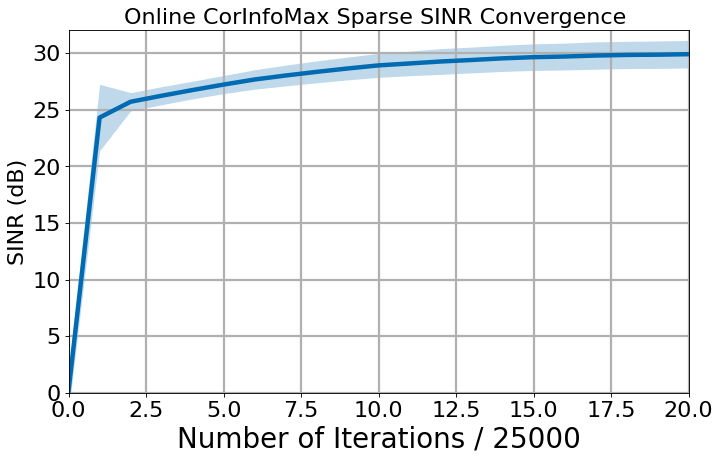

In [8]:
data = np.stack(df_sparse_results.loc[(df_sparse_results['SNRlevel'] == 30) & (df_sparse_results['Model'] == "CorInfoMax")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the medians, 25/75 percentiles, and standard deviation
med, perc_25, perc_75, std_data = perc(data)

x = np.arange(0, med.shape[0])
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, med, linewidth=4, color='#006BB2')
plt.fill_between(x, med + std_data, med - std_data, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
plt.title("Online CorInfoMax Sparse SINR Convergence ")
plt.axis([0.0,20.0,-0,32])
ApplyFont(plt.gca())

plt.savefig('Figures/CorInfoMaxSparse_convergence30dBSNR.pdf', format='pdf')

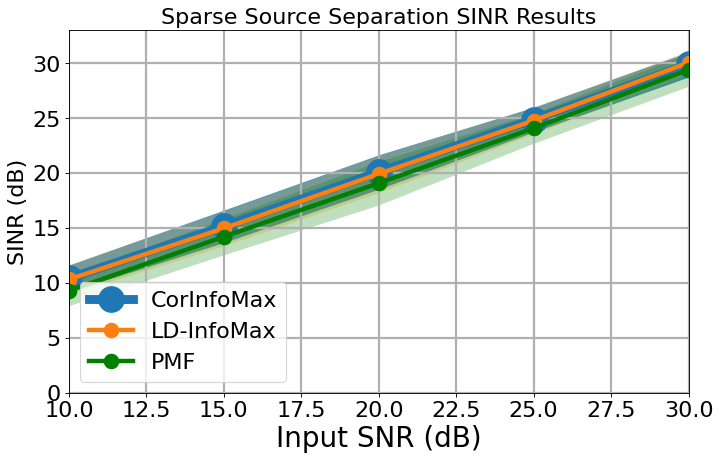

In [9]:
df_sparse_results = df_sparse_results.iloc[:df_sparse_results.shape[0] - np.mod(df_sparse_results.shape[0], 15)]
results = df_sparse_results[['Model', 'SNRlevel', 'SINR']].groupby(['Model', 'SNRlevel']).agg({'SNRlevel':'size', 'SINR':'mean'}).rename(columns={'SNRlevel':'count','SINR':'SINR'}).reset_index()

SINRCorInfoMax = (results.loc[(results['Model'] == 'CorInfoMax')]['SINR'].to_numpy())
SINRLDMI = (results.loc[(results['Model'] == 'LDMI')]['SINR'].to_numpy())
SINRPMF = (results.loc[(results['Model'] == 'PMF')]['SINR'].to_numpy())
SNRinp = (np.array([10, 15, 20, 25, 30]))

dataCorInfo = df_sparse_results.loc[(df_sparse_results['Model'] == 'CorInfoMax')]['SINR'].to_numpy().reshape(df_sparse_results.shape[0]//(15),-1)
dataLDMI = df_sparse_results.loc[(df_sparse_results['Model'] == 'LDMI')]['SINR'].to_numpy().reshape(df_sparse_results.shape[0]//(15),-1)
dataPMF = df_sparse_results.loc[(df_sparse_results['Model'] == 'PMF')]['SINR'].to_numpy().reshape(df_sparse_results.shape[0]//(15),-1)

medCorInfo, perc_25CorInfo, perc_75CorInfo, stdCorInfo = perc(dataCorInfo)
# perc_25CorInfo = np.flipud(perc_25CorInfo)
# perc_75CorInfo = np.flipud(perc_75CorInfo)

medLDMI, perc_25LDMI, perc_75LDMI, stdLDMI = perc(dataLDMI)
# perc_25LDMI= np.flipud(perc_25LDMI)
# perc_75LDMI = np.flipud(perc_75LDMI)

medPMF, perc_25PMF, perc_75PMF, stdPMF = perc(dataPMF)
# perc_25PMF= np.flipud(perc_25PMF)
# perc_75PMF = np.flipud(perc_75PMF)

fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(SNRinp,SINRCorInfoMax,"-o", linewidth=8, markersize = 23, label = "CorInfoMax")
plt.fill_between(SNRinp, SINRCorInfoMax + stdCorInfo, SINRCorInfoMax - stdCorInfo, alpha=0.7, linewidth=0, color='#006BB2')

plt.plot(SNRinp,SINRLDMI,"-o", linewidth=4, markersize = 13, label = 'LD-InfoMax')
plt.fill_between(SNRinp, SINRLDMI + stdLDMI, SINRLDMI - stdLDMI, alpha=0.25, linewidth=0, color='orange')

plt.plot(SNRinp,SINRPMF,"-o", linewidth=4, markersize = 13, color='green', label = 'PMF')
plt.fill_between(SNRinp, SINRPMF + stdPMF, SINRPMF - stdPMF, alpha=0.25, linewidth=0, color='green')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Input SNR (dB)",fontsize=25)
plt.axis([9.99,30,-0,33])
plt.legend(loc='lower left',fontsize=20)
plt.title('Sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())

plt.savefig('Figures/CorInfoMaxSparse_ComparisonNoisy.pdf', format='pdf')

# Nonnegative Sparse Noisy

In [3]:
df_nnsparse_results = pd.read_pickle(r"../Results/simulation_results_nnsparse_noisyV1.pkl")
# df_nnsparse_results

In [4]:
results = df_nnsparse_results[['Model', 'SNRlevel', 'SINR']].groupby(['Model', 'SNRlevel']).agg({'SNRlevel':'size', 'SINR':'mean'}).rename(columns={'SNRlevel':'count','SINR':'SINR'}).reset_index()
# results
table = pd.DataFrame(columns = (["SNRlevel"] + list(df_nnsparse_results['Model'].unique())))
table['SNRlevel'] = list(results['SNRlevel'].unique())
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table = table.iloc[::-1]
table

,SNRlevel,CorInfoMax,LDMI,PMF
4,30,29.415190,29.133438,-136.189427
3,25,25.336926,23.163863,-100.784113
2,20,20.169046,16.937244,-65.983042
1,15,15.250205,12.675028,-231.478959
0,10,10.676986,9.682076,-52.292428


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


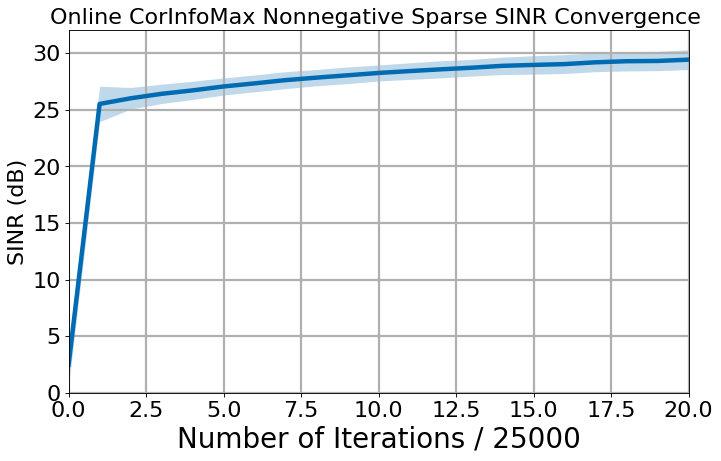

In [5]:
data = np.stack(df_nnsparse_results.loc[(df_nnsparse_results['SNRlevel'] == 30) & (df_nnsparse_results['Model'] == "CorInfoMax")]['SINRlist'].apply(lambda row: np.array(row)).to_numpy(), axis = 0)

# compute the medians and 25/75 percentiles
med, perc_25, perc_75, std_data = perc(data)

x = np.arange(0, med.shape[0])
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, med, linewidth=4, color='#006BB2')
plt.fill_between(x, med + std_data, med - std_data, alpha=0.25, linewidth=0, color='#006BB2')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Number of Iterations / 25000",fontsize=25)
plt.title("Online CorInfoMax Nonnegative Sparse SINR Convergence ")
plt.axis([0.0,20.0,-0,32])
ApplyFont(plt.gca())

plt.savefig('Figures/CorInfoMaxNNSparse_convergence30dBSNR.pdf', format='pdf')

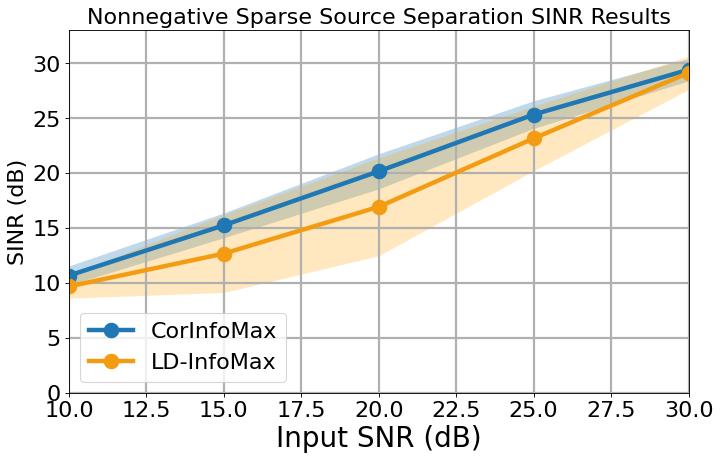

In [6]:
df_nnsparse_results = df_nnsparse_results#.iloc[:df_nnsparse_results.shape[0] - np.mod(df_nnsparse_results.shape[0], 15)]
results = df_nnsparse_results[['Model', 'SNRlevel', 'SINR']].groupby(['Model', 'SNRlevel']).agg({'SNRlevel':'size', 'SINR':'mean'}).rename(columns={'SNRlevel':'count','SINR':'SINR'}).reset_index()

SINRCorInfoMax = (results.loc[(results['Model'] == 'CorInfoMax')]['SINR'].to_numpy())
SINRLDMI = (results.loc[(results['Model'] == 'LDMI')]['SINR'].to_numpy())
SNRinp = (np.array([10, 15, 20, 25, 30]))

dataCorInfo = df_nnsparse_results.loc[(df_nnsparse_results['Model'] == 'CorInfoMax')]['SINR'].to_numpy().reshape(df_nnsparse_results.shape[0]//(15),-1)
dataLDMI = df_nnsparse_results.loc[(df_nnsparse_results['Model'] == 'LDMI')]['SINR'].to_numpy().reshape(df_nnsparse_results.shape[0]//(15),-1)

medCorInfo, perc_25CorInfo, perc_75CorInfo, stdCorInfoMax = perc(dataCorInfo)
# perc_25CorInfo = np.flipud(perc_25CorInfo)
# perc_75CorInfo = np.flipud(perc_75CorInfo)

medLDMI, perc_25LDMI, perc_75LDMI, stdLDMI = perc(dataLDMI)
# perc_25LDMI= np.flipud(perc_25LDMI)
# perc_75LDMI = np.flipud(perc_75LDMI)

fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(SNRinp,SINRCorInfoMax,"-o", linewidth=4, markersize = 13, label = "CorInfoMax")
plt.fill_between(SNRinp, SINRCorInfoMax + stdCorInfoMax, SINRCorInfoMax - stdCorInfoMax, alpha=0.25, linewidth=0, color='#006BB2')

plt.plot(SNRinp,SINRLDMI,"-o", linewidth=4, markersize = 13, label = 'LD-InfoMax', color='#F39C12')
plt.fill_between(SNRinp, SINRLDMI + stdLDMI, SINRLDMI - stdLDMI, alpha=0.25, linewidth=0, color='orange')


gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"Input SNR (dB)",fontsize=25)
plt.axis([9.99,30,-0,33])
plt.legend(loc='lower left',fontsize=20)
plt.title('Nonnegative Sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())

plt.savefig('Figures/CorInfoMaxNNSparse_ComparisonNoisy.pdf', format='pdf')